<a href="https://colab.research.google.com/github/hananlu/rockpaperscissors/blob/main/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Submission

Nama     : Naufal Hanan L

Domisili : Sleman, D I Yogyakarta

In [ ]:
import tensorflow as tf

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2021-05-16 10:07:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss  41%[=======>            ] 128.75M   983KB/s    in 2m 33s  

2021-05-16 10:10:02 (864 KB/s) - Read error at byte 135004160/322873683 (Connection reset by peer). Retrying.

--2021-05-16 10:10:03--  (try: 2)  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (

In [ ]:
#Melakukan Ekstrasi

import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [ ]:
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')

In [ ]:
os.listdir(base_dir)

['scissors', 'paper', 'rock']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.4)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  fill_mode='nearest',
                                  validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory='/tmp/rockpaperscissors/rps-cv-images',
                                                    batch_size=32,
                                                    target_size=(150,150),
                                                    class_mode='categorical',
                                                    subset='training',
                                                    shuffle=True)
validation_generator = test_datagen.flow_from_directory(directory='/tmp/rockpaperscissors/rps-cv-images',
                                                  batch_size=32,
                                                  target_size=(150, 150),
                                                  class_mode='categorical',
                                                  subset='validation',
                                                  shuffle=True)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch=25,
          epochs=10,
          validation_data = validation_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/10
25/25 - 44s - loss: 0.1647 - accuracy: 0.9571 - val_loss: 0.0872 - val_accuracy: 0.9812
Epoch 2/10
25/25 - 44s - loss: 0.1785 - accuracy: 0.9416 - val_loss: 0.1964 - val_accuracy: 0.9312
Epoch 3/10
25/25 - 45s - loss: 0.1258 - accuracy: 0.9663 - val_loss: 0.1563 - val_accuracy: 0.9625
Epoch 4/10
25/25 - 44s - loss: 0.1420 - accuracy: 0.9662 - val_loss: 0.0843 - val_accuracy: 0.9750
Epoch 5/10
25/25 - 46s - loss: 0.0971 - accuracy: 0.9725 - val_loss: 0.1078 - val_accuracy: 0.9688
Epoch 6/10
25/25 - 45s - loss: 0.1044 - accuracy: 0.9725 - val_loss: 0.0927 - val_accuracy: 0.9750
Epoch 7/10
25/25 - 45s - loss: 0.0986 - accuracy: 0.9725 - val_loss: 0.0322 - val_accuracy: 0.9875
Epoch 8/10
25/25 - 44s - loss: 0.0942 - accuracy: 0.9753 - val_loss: 0.0980 - val_accuracy: 0.9750
Epoch 9/10
25/25 - 44s - loss: 0.1105 - accuracy: 0.9675 - val_loss: 0.0385 - val_accuracy: 0.9937
Epoch 10/10
25/25 - 44s - loss: 0.0838 - accuracy: 0.9740 - val_loss: 0.1861 - val_accuracy: 0.9625


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show>

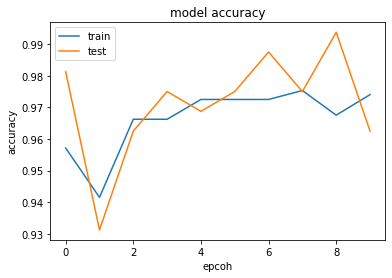

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epcoh')
plt.legend(['train', 'test'], loc='upper left')
plt.show

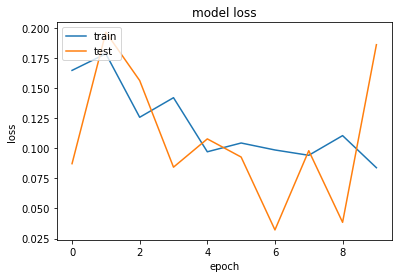

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 2C9FEbBklwcVhF3W.png to 2C9FEbBklwcVhF3W.png
2C9FEbBklwcVhF3W.png
scissors
[[0. 0. 1.]]


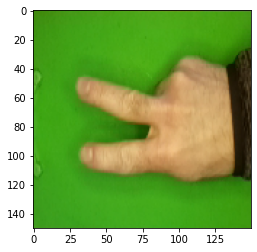

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  
  print(fn)
  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  else:
    print('scissors')
  print(classes)